# Петров Сергей Дмитриевич, Вариант 5

In [1]:
import module_lab1 as lab1
import numpy as np 
import matplotlib.pyplot as plt

### Задача 1, 2

In [2]:
N = 50
dot_color = '#ff5020'

In [3]:
x1 = lab1.calc_x(lab1.create_xi(N), np.array([ 0,    0  ]), lab1.B_diag_symm)
x2 = lab1.calc_x(lab1.create_xi(N), np.array([ 1.5,  1.5]), lab1.B_diag_symm)
x3 = lab1.calc_x(lab1.create_xi(N), np.array([-1.5,  1.5]), lab1.B_diag_symm)
x4 = lab1.calc_x(lab1.create_xi(N), np.array([-1.5, -1.5]), lab1.B_diag_symm)
x5 = lab1.calc_x(lab1.create_xi(N), np.array([ 1.5, -1.5]), lab1.B_diag_symm)

all_data = np.concatenate([x1, x2, x3, x4, x5], axis = 0)

In [4]:
all_data.shape

(250, 2)

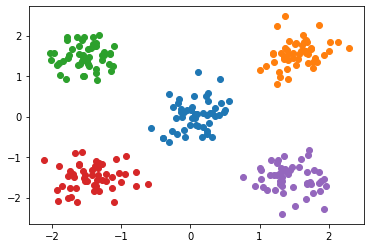

In [5]:
plt.scatter(x1[:,0], x1[:,1])
plt.scatter(x2[:,0], x2[:,1])
plt.scatter(x3[:,0], x3[:,1])
plt.scatter(x4[:,0], x4[:,1])
plt.scatter(x5[:,0], x5[:,1])

plt.show()

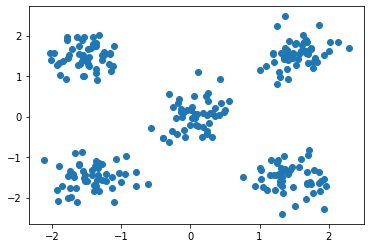

In [6]:
plt.scatter(all_data[:,0], all_data[:,1])
plt.show()

### Задача 3
Разработать программу кластеризации данных с использованием минимаксного алгоритма. В качестве типичного расстояния взять половину среднего расстояния между существующими кластерами. Построить отображение результатов кластеризации для числа кластеров, начиная с двух. Построить график зависимости максимального (из минимальных) и типичного расстояний от числа кластеров. 

In [7]:
def d(x, z):
    return np.sqrt(((x - z)**2).sum(axis = 1))

class MinMaxClassifier:

    def fit(self, x_train, n_clasters):
        
        
        mean_x = x_train.mean(axis = 0)

        first_claster = x_train[np.argmax(d(mean_x, x_train))]

        self.clasters = [first_claster]

        for claster in range(1, n_clasters):
            cur_clasters = np.array(self.clasters)
            self.clasters += [x_train[np.argmax([d(vec, cur_clasters).min() for vec in x_train])]]

        self.clasters = np.array(self.clasters)

        return self
    
    def predict(self, x):
        if(len(x.shape) > 1):
            return np.array([np.argmin(d(vec, self.clasters)) for vec in x])
        else:
            return np.argmin(d(x, self.clasters))
        
    def calc_dist(self, x):
        pred = self.predict(x)

        ret = 0
        for i, claster in enumerate(self.clasters):
            ret += d(claster, x[pred == i]).sum()

        return ret

In [8]:
minmax2 = MinMaxClassifier().fit(all_data, 2)
minmax3 = MinMaxClassifier().fit(all_data, 3)
minmax4 = MinMaxClassifier().fit(all_data, 4)
minmax5 = MinMaxClassifier().fit(all_data, 5)

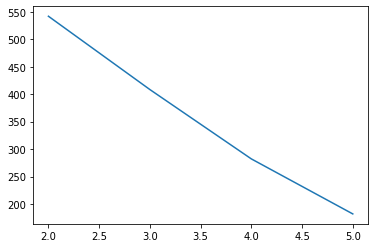

In [9]:
plt.plot(range(2, 6),
    [
        minmax2.calc_dist(all_data),
        minmax3.calc_dist(all_data),
        minmax4.calc_dist(all_data),
        minmax5.calc_dist(all_data)
    ]
)

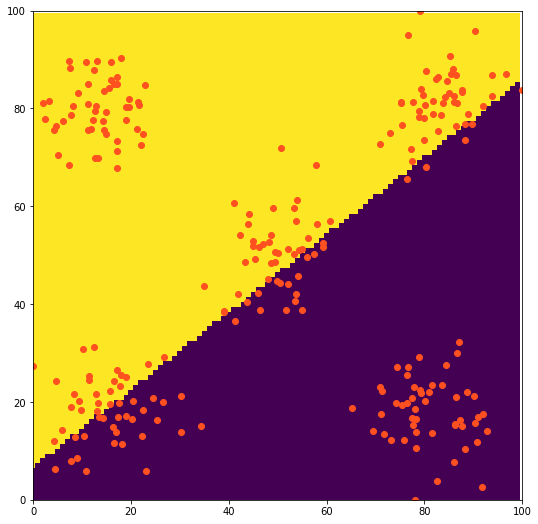

In [10]:
preds = minmax2.predict(all_data)
lab1.plot_classifier_field([all_data], minmax2.predict, colors=dot_color)
plt.show()

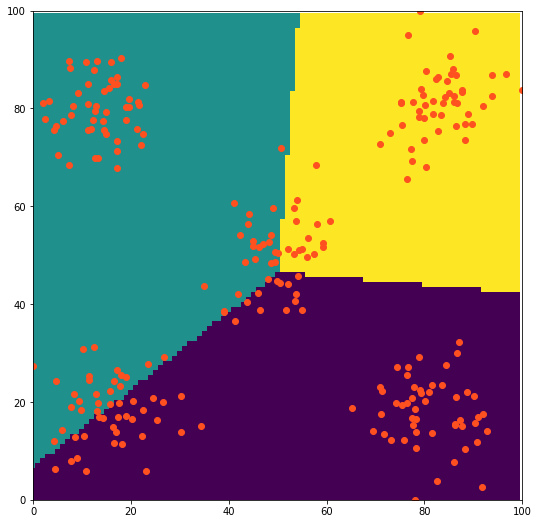

In [11]:
preds = minmax3.predict(all_data)
lab1.plot_classifier_field([all_data], minmax3.predict, colors=dot_color)
plt.show()

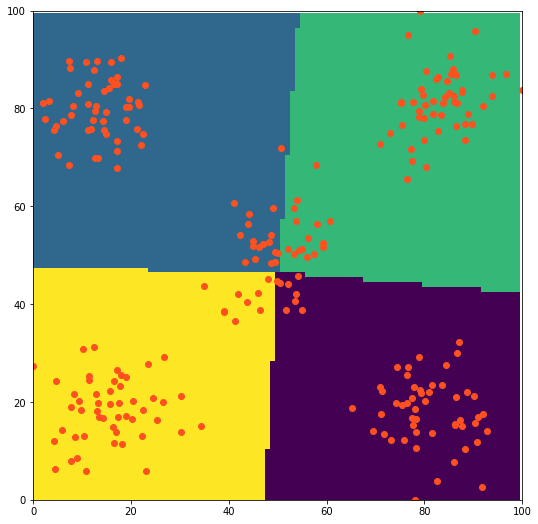

In [12]:
preds = minmax4.predict(all_data)
lab1.plot_classifier_field([all_data], minmax4.predict, colors=dot_color)
plt.show()

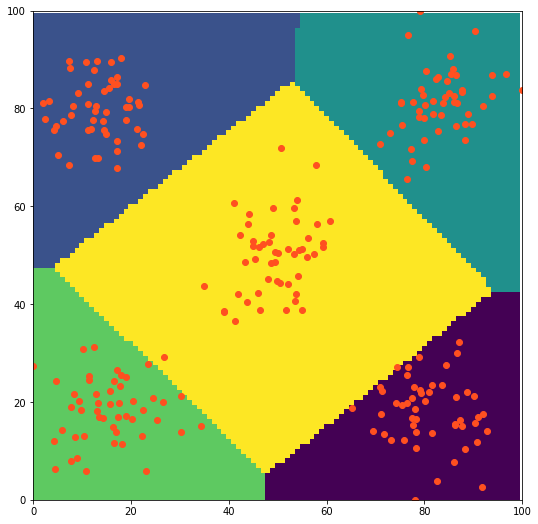

In [13]:
preds = minmax5.predict(all_data)
lab1.plot_classifier_field([all_data], minmax5.predict, colors=dot_color)
plt.show()

### Задача 4
Разработать программу кластеризации данных с использованием алгоритма K внутригрупповых средних для числа кластеров равного 3 и 5. Для ситуации 5 кластеров подобрать начальные условия так, чтобы получить два результата: а) чтобы кластеризация максимально соответствовала первоначальному разбиению на классы («правильная» кластеризация); б) чтобы кластеризация максимально не соответствовала первоначальному разбиению на классы («неправильная» кластеризация). Для всех случаев построить графики зависимости числа векторов признаков, сменивших номер кластера, от номера итерации алгоритма. 

In [33]:
class KMeanClassifier:

    def fit(self, x_train, n_clasters, iters = 200, plot = True):
        indexes = np.arange(x_train.shape[0])
        np.random.shuffle(indexes)

        self.clasters = x_train[indexes[:n_clasters]]

        prev_pred = 0

        for_plot = []
        for iter in range(iters):
            pred = self.predict(x_train)

            for i in range(n_clasters):
                self.clasters[i] = x_train[pred == i].mean(axis = 0)

            if(plot):
                for_plot += [(prev_pred != pred).sum()]

                prev_pred = pred

        if(plot):
            plt.plot(for_plot[1:])
            plt.show()

        return self
    

    def predict(self, x):
        if(len(x.shape) > 1):
            return np.array([np.argmin(d(vec, self.clasters)) for vec in x])
        else:
            return np.argmin(d(x, self.clasters))


In [43]:
kmean2 = KMeanClassifier().fit(all_data, 2, plot = False)
kmean3 = KMeanClassifier().fit(all_data, 3, plot = False)
kmean4 = KMeanClassifier().fit(all_data, 4, plot = False)
kmean5 = KMeanClassifier().fit(all_data, 5, plot = False)

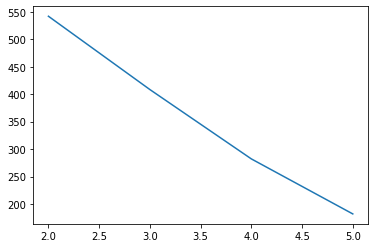

In [49]:
plt.plot(range(2, 6),
    [
        minmax2.calc_dist(all_data),
        minmax3.calc_dist(all_data),
        minmax4.calc_dist(all_data),
        minmax5.calc_dist(all_data)
    ]
)

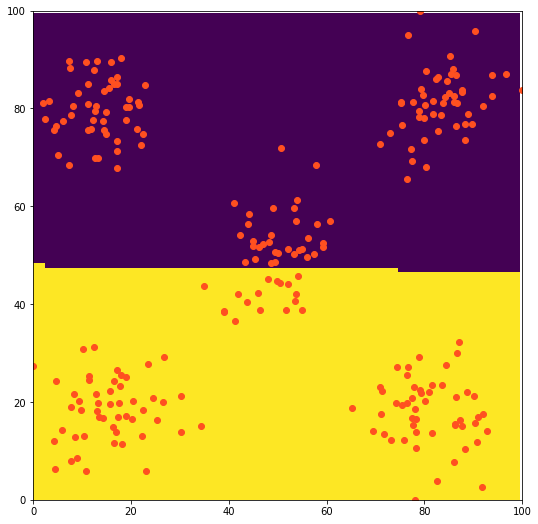

In [50]:
preds = kmean2.predict(all_data)
lab1.plot_classifier_field([all_data], kmean2.predict, colors=dot_color)
plt.show()

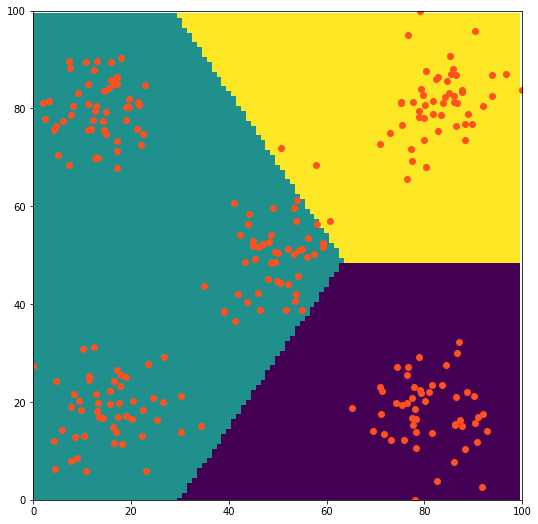

In [51]:
preds = kmean3.predict(all_data)
lab1.plot_classifier_field([all_data], kmean3.predict, colors=dot_color)
plt.show()

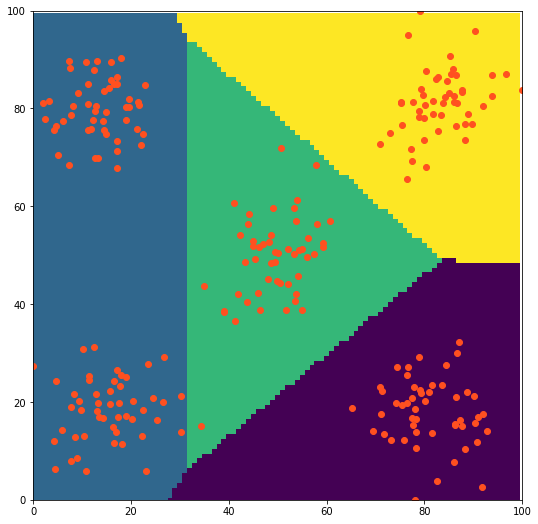

In [52]:
preds = kmean4.predict(all_data)
lab1.plot_classifier_field([all_data], kmean4.predict, colors=dot_color)
plt.show()

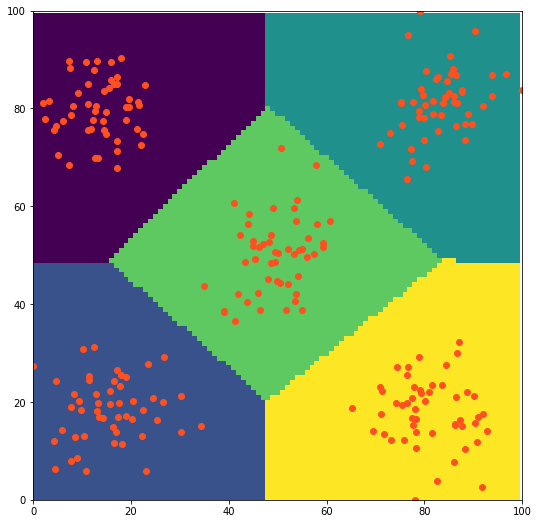

In [54]:
kmean5 = KMeanClassifier().fit(all_data, 5, plot = False)
preds = kmean5.predict(all_data)
lab1.plot_classifier_field([all_data], kmean5.predict, colors=dot_color)
plt.show()

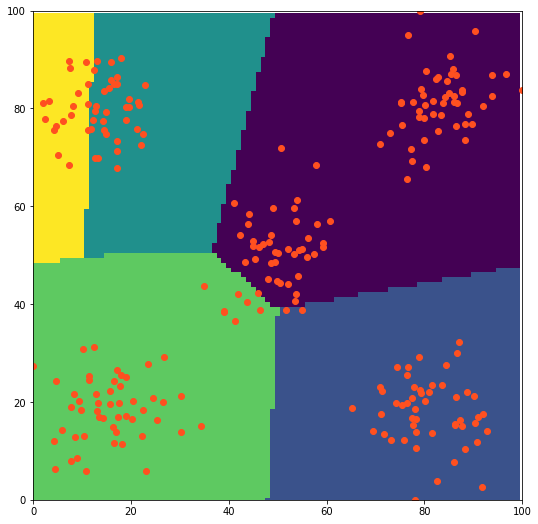

In [55]:
kmean5 = KMeanClassifier().fit(all_data, 5, plot = False)
preds = kmean5.predict(all_data)
lab1.plot_classifier_field([all_data], kmean5.predict, colors=dot_color)
plt.show()